In [1]:
import numpy as np
import matplotlib.pyplot as plt

import h0CpxSpx

In [2]:
C = 299792458.0
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

D = 100.0*Mpc
m1 = 10.0*Mo 
m2=10.0*Mo 

phic=0.0 
tc=0.0 
ra=1.375 
dec=-1.2108

f0 = 20.0
et0 = 0.1

Fp = 1.0
Fx = 0.0

iota = np.pi/3 
beta = np.pi/3 

In [6]:
frequency = np.arange(30,40,10)
hf0 = []

for f in frequency:
    
    M = m1 + m2
    eta = (m1*m2)/(M**2)
    chi = f/f0
    ff = f
    ff = C**3/(G*M*np.pi*6**(3/2))
    l = np.arange(1,11,1)
    
    #eccentricity
    et = et0**3*( - (3323/(1824*chi**(19/6))) + 3323/(1824*chi**(19/18)) ) + \
    et0**5*( 50259743/(6653952*chi**(95/18)) - 11042329/(1108992*chi**(19/6)) + 15994231/(6653952*chi**(19/18)) ) + et0/chi**(19/18)
    
    #calling class for Cx C+ Sx S+
    fn = h0CpxSpx.Fn(et,iota,beta)
    
    #to find Xi
    Gamma_l = Fp*fn.cplus() + Fx*fn.ccross()
    Sigma_l = Fp*fn.splus() + Fx*fn.scross()

    al = np.sign(Gamma_l)*np.sqrt(Gamma_l**2 + Sigma_l**2)

    phil = np.zeros((10,3))
    for i in range(10):
        for j in range(3):
            if Gamma_l[i][j]==0:
                phil[i][j] = -np.sign(Sigma_l[i][j])*np.pi/2 
            else:
                phil[i][j] = np.arctan(- (Sigma_l[i][j]/Gamma_l[i][j]))

    numerator = (1-et**2)**(7/4)
    denomitor = ( 1 + (73/24)*et**2 + (37/96)*et**4 )**(1/2)
    xil = (numerator/denomitor)*al*np.exp(-1j*phil)                
    
    #fourier phase
    psi = l*phic - 2*np.pi*f*tc - 3/(128*eta) * ((G*M*np.pi*f)/C**3)**(-5/3) * \
    (l/2)**(8/3) *( 1 + et0**6 *( -(75356125/(3326976 *chi**(19/3)))+\
                                 (17355248095/(455518464 *chi**(38/9)))-\
                                 (1326481225/(101334144 *chi**(19/9))) ) + \
                   et0**4 *( (5222765/(998944 *chi**(38/9))) - (2608555/(444448 *chi**(19/9))) ) - \
                   (2355 *et0**2)/(1462 *chi**(19/9)) ) 
    
    #defining unit-step function 
    def unitstep(lp):
        if lp*ff-2*f>=0:
            return(1)
        else:
            return(0)

    def uniarray():
        lx = np.arange(1,11,1)
        for i in range(10):
            lx[i] = unitstep(l[i])

        return(lx)
    
    #frequency domain waveform
    s = np.sum( xil[:,0]*((l/2)**(2/3))*np.exp( -1j*(np.pi/4 + psi) )*uniarray() ) + \
    np.sum( xil[:,-2]*((l/2)**(2/3))*np.exp( -1j*(np.pi/4 + psi) )*uniarray() ) + \
    np.sum( xil[:,2]*((l/2)**(2/3))*np.exp( -1j*(np.pi/4 + psi) )*uniarray() )
    hf = ((5*np.pi*eta)/384)**(1/2) * (G**2*M**2)/(C**5*D)*( ((G*M*np.pi*f)/C**3)**(-7/6) )*np.sum(s)
    
    hf0 = np.append(hf0,hf)
    
    
    
    
    
    
    
    
    
    

In [19]:
hf0

array([2.98656253e-23-4.14833298e-23j])

In [18]:
xil

array([[ 4.86750904e-02+0.00000000e+00j, -6.07338182e-02+1.05194059e-01j,
        -2.57201368e-05-4.45485837e-05j],
       [ 3.20292677e-03+0.00000000e+00j,  1.21908698e+00-2.11152059e+00j,
        -1.45164246e-06-2.51431849e-06j],
       [ 2.37082467e-04+0.00000000e+00j,  1.80754848e-01-3.13076581e-01j,
        -9.12795972e-08-1.58100900e-07j],
       [ 1.84871394e-05+0.00000000e+00j,  2.11527002e-02-3.66375515e-02j,
        -6.14717018e-09-1.06472111e-08j],
       [ 1.49149669e-06+0.00000000e+00j,  2.26554550e-03-3.92403991e-03j,
         0.00000000e+00+0.00000000e+00j],
       [ 1.22216920e-07+0.00000000e+00j,  2.31839062e-04-4.01557034e-04j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  2.33964125e-05-4.05237751e-05j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  2.28898264e-06-3.96463424e-06j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j

In [17]:
G

6.674079999999999e-11

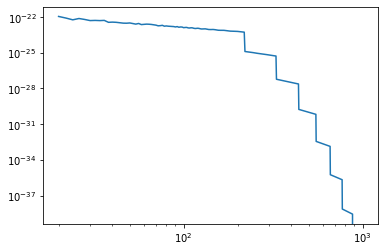

In [6]:
plt.loglog(frequency,abs(hf0))